In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Kaç renk sınıfı kullanmak istiyorsunuz? (Örneğin 2, 3, 5 gibi): 8


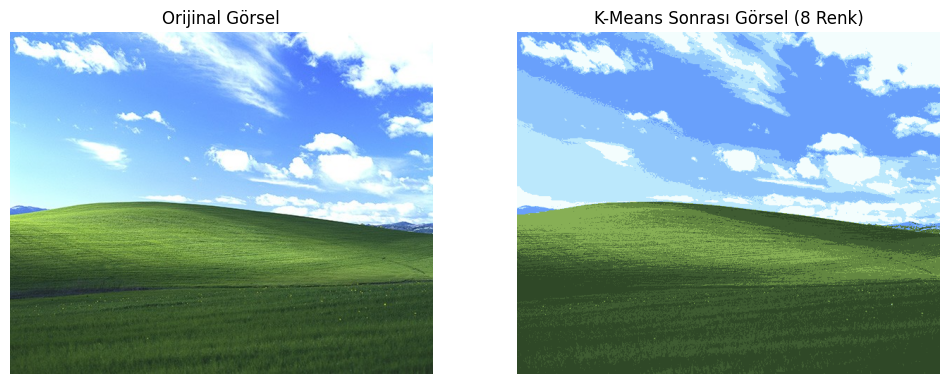

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.centroids = None

    def fit(self, X):
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._calculate_centroids(X, labels)
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _calculate_centroids(self, X, labels):
        return np.array([X[labels == j].mean(axis=0) for j in range(self.k)])

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

# Görseli yükleme ve K-Means ile işleme
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR formatını RGB'ye çevirme
    return img

def kmeans_color_quantization(image, k):
    # Görseli (piksel sayısı, renk kanalları) formatına dönüştürme
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # KMeans sınıfını oluşturup eğitme
    kmeans = KMeans(k=k)
    kmeans.fit(pixel_values)

    # Her pikseli en yakın merkeze göre renklendirme
    clustered = kmeans.centroids[kmeans.predict(pixel_values)]
    clustered_image = clustered.reshape(image.shape)
    return clustered_image.astype(np.uint8)

# Kullanıcıdan renk sınıfı sayısını alma
def get_user_input():
    while True:
        try:
            k = int(input("Kaç renk sınıfı kullanmak istiyorsunuz? (Örneğin 2, 3, 5 gibi): "))
            if k > 0:
                return k
            else:
                print("Lütfen pozitif bir tamsayı girin.")
        except ValueError:
            print("Geçerli bir sayı girin.")

# Görsel yolunu tanımlama
image_path = "/content/drive/MyDrive/Colab Notebooks/dene2.jpg"

# Kullanıcıdan renk sınıfı sayısını alıp görseli işleme
k = get_user_input()
original_image = load_image(image_path)
clustered_image = kmeans_color_quantization(original_image, k=k)

# Orijinal ve işlenmiş görselleri gösterme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Orijinal Görsel')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'K-Means Sonrası Görsel ({k} Renk)')
plt.imshow(clustered_image)
plt.axis('off')

plt.show()
